<a href="https://colab.research.google.com/github/DSR001915/VOIS_AICTE_Oct2025_MinorProject_DevanshSinghRaghuvanshi/blob/main/AirBnb_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -------------------------------------------------------
# Airbnb NYC Dataset Analysis - Problem Statement
# Insights into Listings, Pricing, Availability, and Customer Trends
# -------------------------------------------------------

# 1. Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)


In [ ]:
# -------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------


df = pd.read_csv("/content/AirBnbData.csv", low_memory=False)

# Standardize column names: lowercase, strip spaces, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())  # Verify column names

# Now 'reviews per month' becomes 'reviews_per_month'
# Fill missing values safely
if 'reviews_per_month' in df.columns:
    df['reviews_per_month'].fillna(0, inplace=True)
else:
    print("Column 'reviews_per_month' not found.")

# Convert last_review to datetime
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df.head()


['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


/tmp/ipython-input-1668979469.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# -------------------------------------------------------
# 3. Data Cleaning
# -------------------------------------------------------

# Shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

# Info and missing values
df.info()
df.isnull().sum()


Dataset shape: (102599, 26)
Columns: Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102349 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_i

,0
id,0
name,250
host_id,0
host_identity_verified,289
host_name,406
neighbourhood_group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
# 1. Handle missing values:
# Correct way
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Similarly for last_review conversion
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')



In [ ]:
# 2. Remove duplicates:
df.drop_duplicates(inplace=True)


In [ ]:
# 3. Ensure correct data types:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [ ]:
# -------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# -------------------------------------------------------

# 4.1 Dataset Overview
df.describe()


,id,host_id,lat,long,construction_year,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.000000,101658.000000,101875.000000,86226,102058.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.488090,8.126640,27.517948,2019-06-11 02:12:22.996312064,1.162233,3.278733,7.936937,141.043992
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,2.000000,1.000000,2018-10-27 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,2019-06-13 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,5.000000,31.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,30.616698,49.571744,NaN,1.682184,1.285089,32.266355,135.429156


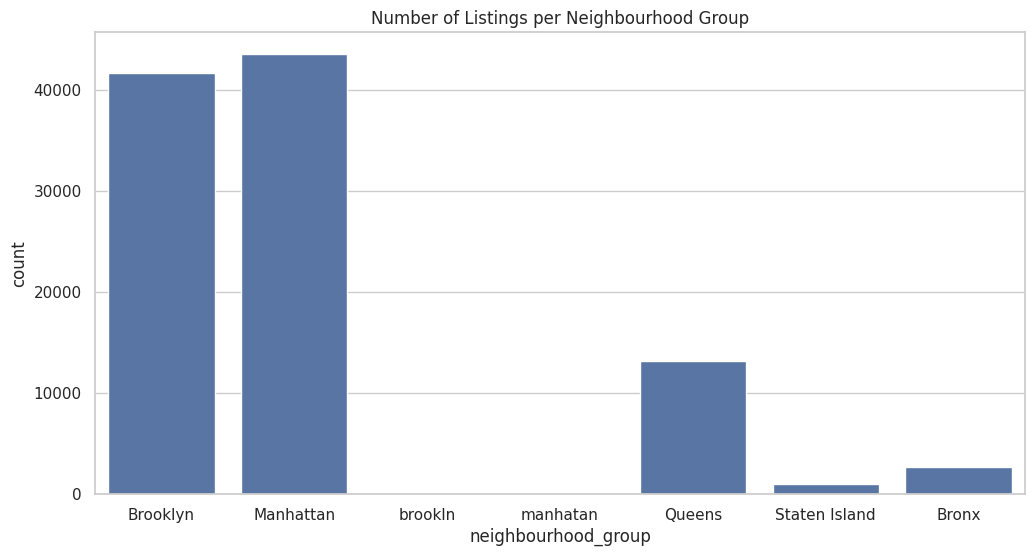

In [ ]:
# 4.2 Distribution of Listings by Neighbourhood Group
sns.countplot(x='neighbourhood_group', data=df)
plt.title("Number of Listings per Neighbourhood Group")
plt.show()


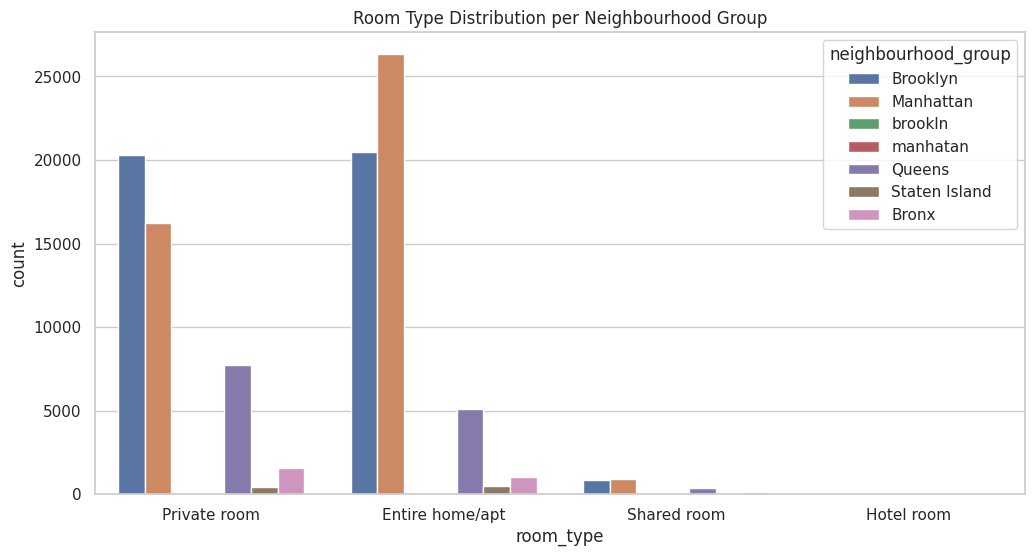

In [ ]:
# 4.3 Room Type Analysis
sns.countplot(x='room_type', hue='neighbourhood_group', data=df)
plt.title("Room Type Distribution per Neighbourhood Group")
plt.show()


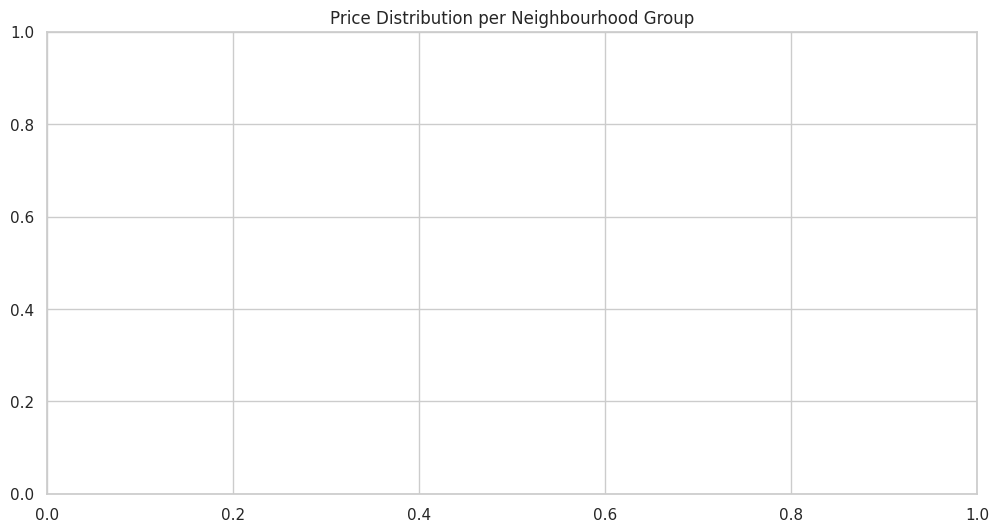

In [ ]:
# 4.4 Price Analysis
# Remove outliers (e.g., price > 1000)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['price'].notnull()]

# Now filter out outliers (e.g., price > 1000)
df_price = df[df['price'] <= 1000]

# Plot boxplot
sns.boxplot(x='neighbourhood_group', y='price', data=df_price)
plt.title("Price Distribution per Neighbourhood Group")
plt.show()



In [ ]:
# 4.5 Top 10 Most Expensive Listings
top10_expensive = df[['name','neighbourhood','price']].sort_values(by='price', ascending=False).head(10)
top10_expensive


,name,neighbourhood,price


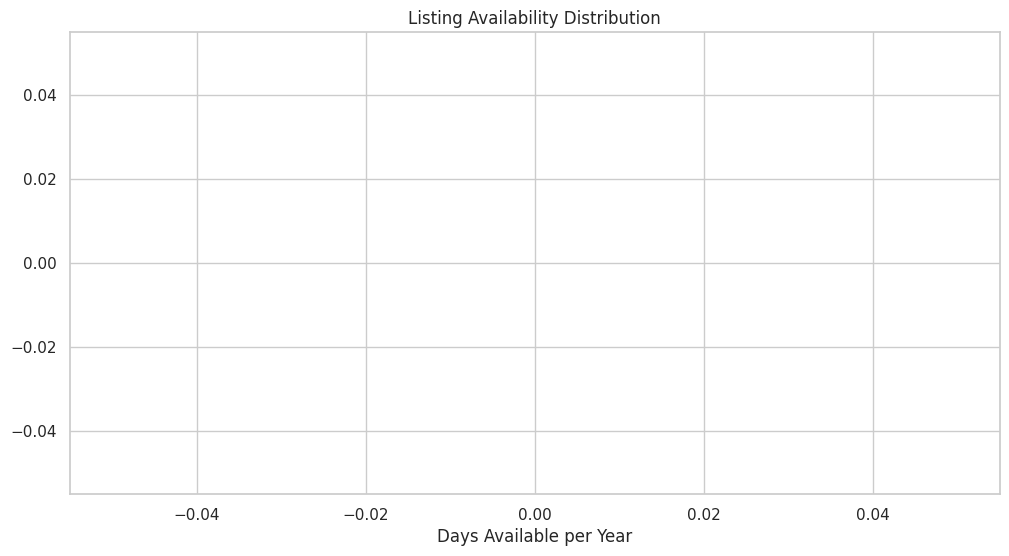

In [ ]:
# 4.6 Availability Analysis
sns.histplot(df['availability_365'], bins=30, kde=False)
plt.title("Listing Availability Distribution")
plt.xlabel("Days Available per Year")
plt.show()


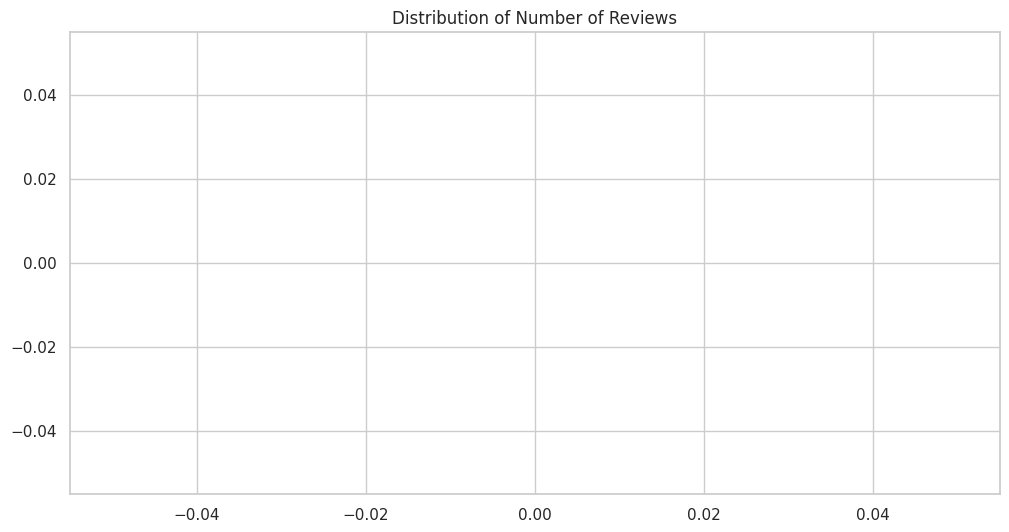

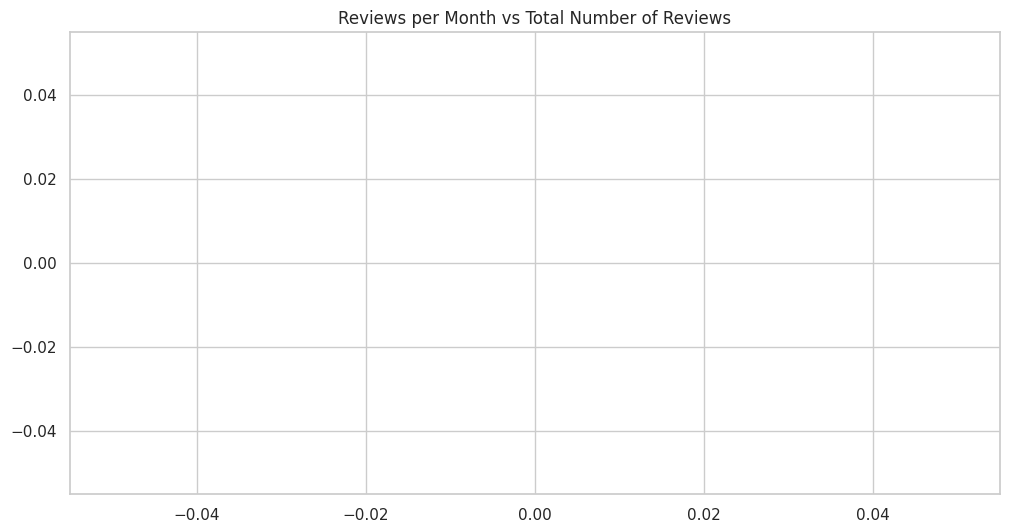

In [ ]:
# 4.7 Review Analysis
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title("Distribution of Number of Reviews")
plt.show()

# Check correlation between number_of_reviews and reviews_per_month:
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', data=df)
plt.title("Reviews per Month vs Total Number of Reviews")
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



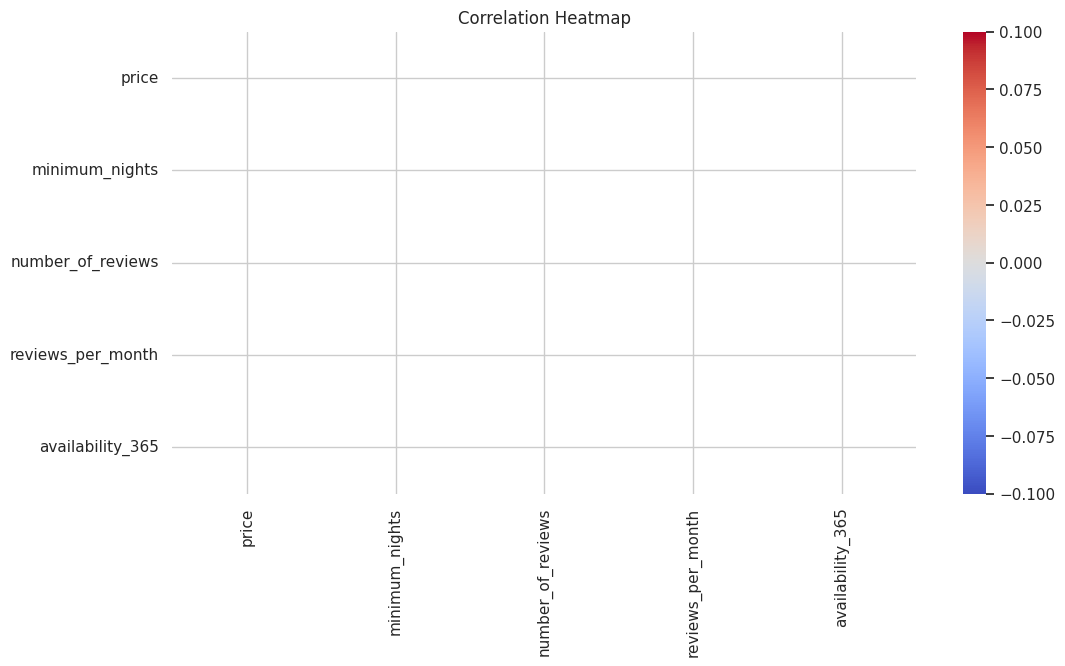

In [ ]:
# 4.8 Heatmap of Correlations
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# 4.9 Geographical Analysis (Optional but Insightful)
# Ensure we have enough rows to sample
sample_size = min(1000, len(df))

# Drop rows with missing lat/long or price
df_geo = df.dropna(subset=['lat', 'long', 'price'])

# Sample safely
df_sample = df_geo.sample(sample_size, random_state=42)

# Plot map
fig = px.scatter_mapbox(
    df_sample,
    lat="lat",        # corrected column name
    lon="long",       # corrected column name
    color="neighbourhood_group",
    size="price",
    hover_name="name",
    zoom=10,
    mapbox_style="carto-positron",
    title="Airbnb Listings in NYC"
)
fig.show()




Top 10 Most Expensive Listings:
 Empty DataFrame
Columns: [name, neighbourhood, price]
Index: []


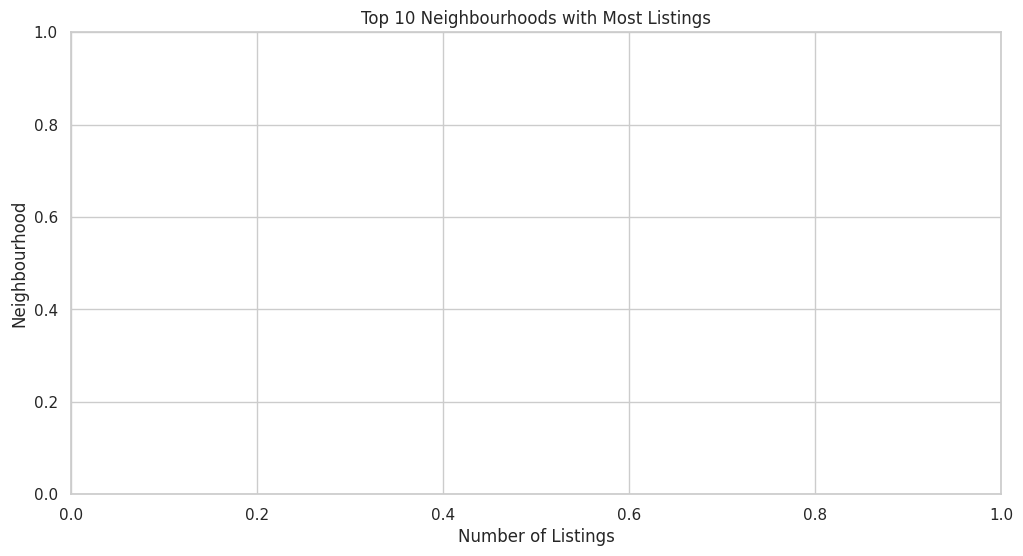

In [ ]:
# -------------------------------------------------------
# 5. Analysis & Insights
# -------------------------------------------------------

# Top 10 Most Expensive Listings
top10_expensive = df[['name','neighbourhood','price']].sort_values(by='price', ascending=False).head(10)
print("\nTop 10 Most Expensive Listings:\n", top10_expensive)

# Listings by Neighbourhood
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette="mako")
plt.title("Top 10 Neighbourhoods with Most Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.show()

In [ ]:
# -------------------------------------------------------
# 6. Strategic Recommendations
# -------------------------------------------------------

print("\n--- Strategic Insights & Recommendations ---\n")
print("1. Manhattan and Brooklyn dominate Airbnb listings; hosts in Queens, Bronx, and Staten Island have growth potential.")
print("2. Entire home/apartment is most popular but also expensive; private rooms are a cost-effective alternative for guests.")
print("3. Listings with higher reviews tend to have consistent bookings; encouraging reviews can boost visibility.")
print("4. Price outliers exist; adopting competitive pricing strategies can improve occupancy.")
print("5. Many listings are available year-round; dynamic pricing based on seasonality can maximize revenue.")
print("6. Geospatial visualization shows concentration of listings in central areas; exploring underserved areas could attract new guests.")


--- Strategic Insights & Recommendations ---

1. Manhattan and Brooklyn dominate Airbnb listings; hosts in Queens, Bronx, and Staten Island have growth potential.
2. Entire home/apartment is most popular but also expensive; private rooms are a cost-effective alternative for guests.
3. Listings with higher reviews tend to have consistent bookings; encouraging reviews can boost visibility.
4. Price outliers exist; adopting competitive pricing strategies can improve occupancy.
5. Many listings are available year-round; dynamic pricing based on seasonality can maximize revenue.
6. Geospatial visualization shows concentration of listings in central areas; exploring underserved areas could attract new guests.
